In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
comp = pd.read_csv("companies.csv")
# acq = pd.read_csv("acquisitions.csv")

In [3]:
print(comp.shape)
comp.head()

(66368, 14)


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


# filter the dataset by "first_funding_at" after 1990 

In [4]:
# filter the dataset by "first_funding_at" after 1990
comp_filter = comp[comp['first_funding_at'] >= '1990-01-01']

In [5]:
comp_filter.shape

(66297, 14)

In [6]:
comp_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66297 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66297 non-null  object
 1   name               66296 non-null  object
 2   homepage_url       61259 non-null  object
 3   category_list      63165 non-null  object
 4   funding_total_usd  66297 non-null  object
 5   status             66297 non-null  object
 6   country_code       59351 non-null  object
 7   state_code         57764 non-null  object
 8   region             58281 non-null  object
 9   city               58283 non-null  object
 10  funding_rounds     66297 non-null  int64 
 11  founded_at         51093 non-null  object
 12  first_funding_at   66297 non-null  object
 13  last_funding_at    66297 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.6+ MB


# create subdataframe for each category

In [7]:
# how many categories?
cat_comp_dict = {}
comp_cat_dict = {}
l_maxlen = 0
all_cat_list = []
for idx, s in enumerate(comp_filter["category_list"]):
    if type(s) != str:
        cat_comp_dict[idx] = 0
        continue
    l = s.split("|")
    comp_cat_dict[idx] = l
    if len(l) > l_maxlen:
        l_maxlen = len(l)
        l_max_show = l
#         print(l_max_show)
    for i in l:
        all_cat_list.append(i)
        if i not in cat_comp_dict.keys():
            cat_comp_dict[i] = []
        cat_comp_dict[i].append(idx)
print(len(cat_comp_dict))
print(l_maxlen)
print(l_max_show)

# def add_cid(cat, cat_dict, cid):
#     if cat not in cat_dict.keys():
#         cat_dict[cat] = []
#     cat_dict[cat].append(cid)

3990
44
['Ad Targeting', 'Analytics', 'Business Analytics', 'Cloud Computing', 'CRM', 'Databases', 'E-Commerce', 'E-Commerce Platforms', 'Email Marketing', 'Enterprise Software', 'Fitness', 'Health and Wellness', 'Internet Marketing', 'iOS', 'Local Based Services', 'Local Businesses', 'Local Search', 'Marketing Automation', 'Messaging', 'Mobile Advertising', 'Mobile Commerce', 'Mobile Payments', 'Mobility', 'Networking', 'Online Reservations', 'Online Scheduling', 'Online Shopping', 'Private Social Networking', 'Productivity Software', 'Reputation', 'Reviews and Recommendations', 'SaaS', 'Sales and Marketing', 'Sales Automation', 'Search Marketing', 'SMS', 'Social Commerce', 'Social CRM', 'Social Media', 'Social + Mobile + Local', 'Social Network Media', 'Software', 'Tracking', 'Web Presence Management']


In [8]:
all_cat_stats = Counter(all_cat_list)
all_cat_stats = pd.DataFrame.from_dict(all_cat_stats, orient='index', columns=['num of companies'])
all_cat_stats['percentage of total companies'] = all_cat_stats['num of companies'] / len(comp_filter) * 100
all_cat_stats = all_cat_stats.sort_values('percentage of total companies',ascending=False)
all_cat_stats.head()

,num of companies,percentage of total companies
Software,8759,13.211759
Mobile,5553,8.375945
Biotechnology,4560,6.878139
E-Commerce,4149,6.258202
Curated Web,3029,4.568834


In [9]:
all_cat_stats.tail()

,num of companies,percentage of total companies
Invention,1,0.001508
Startup Histrionics,1,0.001508
FPGA,1,0.001508
Labor Optimization,1,0.001508
Gay & Lesbian,1,0.001508


In [10]:
all_cat_stats.index

Index(['Software', 'Mobile', 'Biotechnology', 'E-Commerce', 'Curated Web',
       'Social Media', 'Enterprise Software', 'Advertising', 'Health Care',
       'Games',
       ...
       'Vulnerability Management', 'Made in Italy', 'Private Corrections',
       'Biotechnology and Semiconductor', 'Hip Hop', 'Invention',
       'Startup Histrionics', 'FPGA', 'Labor Optimization', 'Gay & Lesbian'],
      dtype='object', length=858)

In [11]:
sub_cat_dataset = {}
sub_status = {}

for cat, cid in cat_comp_dict.items():
    print(cid)
    #cid = int(cid)  # Convert cid to an integer
    #print(df)
    df = comp_filter.iloc[cid,:]
    sub_cat_dataset[cat] = df
    
    
    sub_status[cat] = dict(df.groupby('status')['name'].count())

[0, 14, 27, 126, 195, 223, 408, 527, 541, 547, 600, 608, 767, 963, 1006, 1084, 1088, 1289, 1334, 1354, 1361, 1364, 1407, 1450, 1506, 1671, 1682, 1688, 1698, 1702, 1830, 2048, 2096, 2173, 2264, 2302, 2494, 2495, 2498, 2516, 2545, 2548, 2618, 2904, 2933, 2968, 3018, 3173, 3296, 3413, 3436, 3896, 4464, 4884, 4959, 5007, 5154, 5264, 5597, 5598, 5605, 5683, 5734, 5770, 5786, 5807, 5915, 5973, 6011, 6020, 6025, 6035, 6127, 6162, 6171, 6247, 6443, 6458, 6503, 6511, 6519, 6650, 6701, 7023, 7198, 7206, 7310, 7315, 7316, 7358, 7441, 7460, 7583, 7630, 7843, 7890, 8130, 8293, 8459, 8484, 8604, 8711, 8765, 8851, 8872, 8945, 9027, 9043, 9070, 9090, 9147, 9332, 9374, 9494, 9600, 9620, 9858, 9945, 10063, 10440, 10477, 10788, 10979, 10983, 11086, 11127, 11148, 11164, 11348, 11699, 11754, 12120, 12336, 12410, 12451, 12560, 12692, 12925, 13007, 13017, 13039, 13143, 13237, 13361, 13666, 13785, 13793, 13865, 13888, 13943, 13954, 13977, 13983, 14153, 14167, 14170, 14201, 14237, 14266, 14346, 14420, 14616, 1

AttributeError: 'str' object has no attribute 'ndim'

In [12]:
sub_status_df = pd.DataFrame.from_dict(sub_status, orient='index')
sub_status_df.fillna(0, inplace=True)
sub_status_df.head()

,acquired,closed,ipo,operating
Media,65.0,71.0,11.0,682
Application Platforms,11.0,43.0,2.0,198
Real Time,35.0,29.0,3.0,307
Social Network Media,76.0,140.0,6.0,631
Apps,97.0,162.0,7.0,1610


In [13]:
# sub_status_df['total'] = sub_status_df['acquired'] + sub_status_df['closed'] + sub_status_df['ipo'] + sub_status_df['operating']
# sub_status_df.sort_values('total', ascending=False).head()

In [14]:
sub_status_arr = sub_status_df.to_numpy()
# print(sub_status_arr.shape)
tot = np.sum(sub_status_arr, axis=1)
# print(len(tot))
acq_p = sub_status_arr[:,0] / tot *100
# print(len(acq_p))
closed_p = sub_status_arr[:,1] / tot * 100
ipo_p = sub_status_arr[:,2] / tot * 100
operating_p = sub_status_arr[:,3] / tot * 100

sub_status_df['total'] = tot
sub_status_df['acq_percent'] = acq_p
sub_status_df['closed_percent'] = closed_p
sub_status_df['ipo_percent'] = ipo_p
sub_status_df['operating_percent'] = operating_p

sub_status_df = sub_status_df.sort_values('total', ascending=False)
sub_status_df.head()

,acquired,closed,ipo,operating,total,acq_percent,closed_percent,ipo_percent,operating_percent
Software,1071.0,645.0,160.0,6883,8759.0,12.227423,7.363854,1.826693,78.582030
Mobile,546.0,478.0,75.0,4454,5553.0,9.832523,8.607960,1.350621,80.208896
Biotechnology,371.0,274.0,476.0,3439,4560.0,8.135965,6.008772,10.438596,75.416667
E-Commerce,263.0,334.0,59.0,3493,4149.0,6.338877,8.050133,1.422029,84.188961
Curated Web,407.0,525.0,38.0,2059,3029.0,13.436778,17.332453,1.254539,67.976230


In [15]:
id = cat_comp_dict['Software']
df = comp_filter.iloc[id,:]

In [16]:
dict(df.groupby('status')['name'].count())

{'acquired': 1071, 'closed': 645, 'ipo': 160, 'operating': 6883}

In [17]:
d = {'a': {'acquired': 1071, 'closed': 645, 'ipo': 160, 'operating': 6883}, 
'b': {'acquired': 10, 'closed': 6, 'ipo': 1, 'operating': 68}}

f = pd.DataFrame.from_dict(d, orient='index')
f

,acquired,closed,ipo,operating
a,1071,645,160,6883
b,10,6,1,68


In [18]:
d = {0: [1,2,3]}

In [19]:
d[0].append(4)
d[1] = []
d[1].append(5)
0 in d.keys()


True

In [20]:
# split the category column
# new data frame with split value columns 
new = comp["category_list"].str.split("|", n = 3, expand = True) 
  
# making seperate first name column from new data frame 
comp["category_1"]= new[0] 
  
# making seperate last name column from new data frame 
comp["category_2"]= new[1] 
  
# Dropping old Name columns 
comp.drop(columns =["category_list"], inplace = True) 

# df display 
comp.head()

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2
0,/organization/-fame,#fame,http://livfame.com,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Media,None
1,/organization/-qounter,:Qounter,http://www.qounter.com,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Application Platforms,Real Time
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,Apps,Games
3,/organization/0-6-com,0-6.com,http://www.0-6.com,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web,None
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software,None


# Label the dataset 
### ipo and acquired , lable = 1, others label = 0

In [21]:
data_stats = comp.groupby('status').count()
data_stats

,permalink,name,homepage_url,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2
status,,,,,,,,,,,,,,
acquired,5549,5549,5087,5549,5249,5189,5204,5204,5549,4333,5548,5549,5429,2777
closed,6238,6237,5519,6238,4587,4456,4487,4487,6238,4082,6237,6238,5285,2954
ipo,1547,1547,1511,1547,1507,1480,1491,1491,1547,1187,1547,1547,1534,718
operating,53034,53034,49193,53034,48067,46696,47156,47158,53034,41545,53012,53034,50972,26945


In [22]:
# data_stats.index

In [23]:
# data_stats.plot.bar(y='name',rot=15)

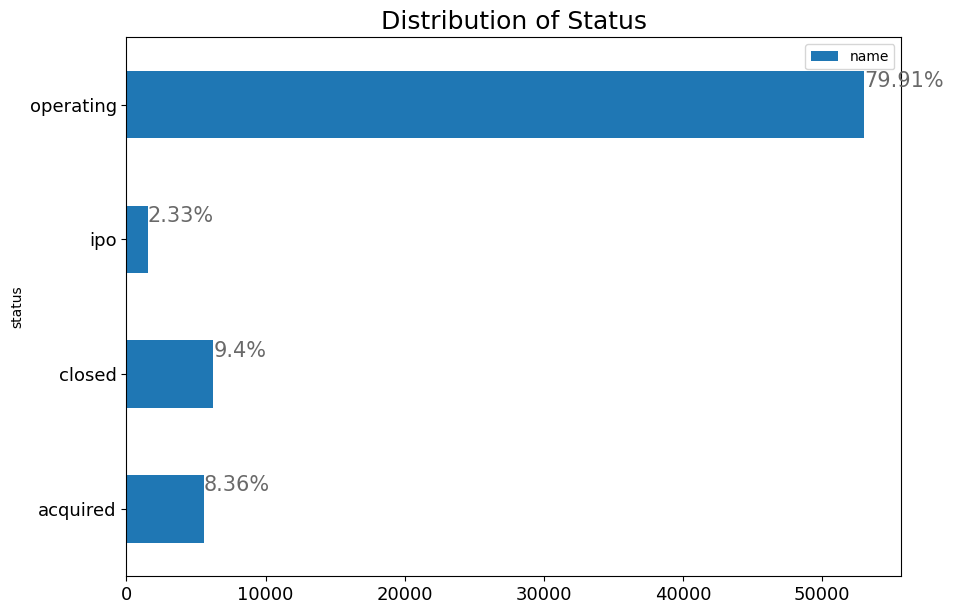

In [24]:
ax = data_stats.plot(kind='barh', y='name', figsize=(10,7), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Status", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

# # invert for largest on top 
# ax.invert_yaxis()
plt.show()

In [25]:
# Check the companies with same names
# names = comp_filter['name']
# sorted(Counter(names).items(), key=lambda x: x[1], reverse=True)

In [26]:
comp_filter['label'] = 0
comp_filter.loc[comp_filter.status == 'ipo', 'label'] = 1
comp_filter.loc[comp_filter.status == 'acquired', 'label'] = 1
comp_filter.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11988\3839481040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_filter['label'] = 0


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0


In [27]:
comp_filter['category_list'][1]

'Application Platforms|Real Time|Social Network Media'

In [28]:
comp_filter.to_csv("comp_filter.csv", index=False, encoding='utf8')

In [29]:
df = pd.read_csv('comp_filter.csv')

In [30]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0


# Add investor number to the dataset

In [37]:
investor = pd.read_csv('investments.csv')
investor_num = investor[['company_permalink',
                         'investor_permalink']].groupby(['company_permalink']).agg(['count'])

In [38]:
comp_plus_InvestorNum = pd.merge(how='inner',left=df, right=investor_num, 
                                 left_on='permalink', right_on='company_permalink')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11988\338676384.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  comp_plus_InvestorNum = pd.merge(how='inner',left=df, right=investor_num,


In [40]:
comp_plus_InvestorNum.to_csv('comp_plus_InvestorNum.csv',index=False, encoding='utf8')

# Deal with the data type
1. calculate the funding_duration
2. Change datetime to UTC

In [41]:
df = pd.read_csv('comp_plus_InvestorNum.csv')

In [42]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label,"('investor_permalink', 'count')"
0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,1
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,1
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,0,1
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0,14
4,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,0,13


In [43]:
df.rename(columns={"('investor_permalink', 'count')": "num_of_investor"}, inplace=True)
#df['Num_of_investor'] = df.iloc[:,-1]

In [44]:
# convert '-' to NAN in comp['funding_total_usd']:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

In [46]:
# convert datetime type for "last_funding_at","first_funding_at"
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

In [47]:
# calculate the funding_duration between 'first_funding_at' and 'last_funding_at'
df['funding_duration'] = df['last_funding_at'] - df['first_funding_at']

In [48]:
# convert timedelta to integer representing number of days
df['funding_duration'] = df['funding_duration'].dt.days

In [49]:
# check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44682 entries, 0 to 44681
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          44682 non-null  object        
 1   name               44681 non-null  object        
 2   homepage_url       41931 non-null  object        
 3   category_list      42263 non-null  object        
 4   funding_total_usd  36167 non-null  float64       
 5   status             44682 non-null  object        
 6   country_code       39700 non-null  object        
 7   state_code         38516 non-null  object        
 8   region             38879 non-null  object        
 9   city               38881 non-null  object        
 10  funding_rounds     44682 non-null  int64         
 11  founded_at         33278 non-null  object        
 12  first_funding_at   44682 non-null  datetime64[ns]
 13  last_funding_at    44682 non-null  datetime64[ns]
 14  label 

In [50]:
df.to_csv('companies_allFeatures.csv', index=False, encoding='utf8')

# Date Preprocessing
1. Select features, filter out missing data
2. Shuffle the dataset
4. Split dataset to training, dev and test set (90%, 5%, 5%)
2. Upsample the training set to balance.
3. Encode and transform category features.
2. Encode and transform text features.
3. Concatenate all the features.

In [51]:
import sklearn
from scipy.sparse import hstack
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample, shuffle
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_csv('companies_allFeatures.csv')

In [53]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label,num_of_investor,funding_duration
0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,1,0
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,1,0
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,0,1,0
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000.0,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0,14,1040
4,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050.0,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,0,13,931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44677,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01,0,1,0
44678,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,0,3,851
44679,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,0,2,0
44680,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,0,1,0


In [54]:
# select meaningful features
df = df.drop(columns=['permalink', 'name', 'homepage_url', 'status', 'state_code',
                      'region','city', 'founded_at', 'first_funding_at','last_funding_at'])

In [55]:
df_clean = df.dropna()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44682 entries, 0 to 44681
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category_list      42263 non-null  object 
 1   funding_total_usd  36167 non-null  float64
 2   country_code       39700 non-null  object 
 3   funding_rounds     44682 non-null  int64  
 4   label              44682 non-null  int64  
 5   num_of_investor    44682 non-null  int64  
 6   funding_duration   44682 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.4+ MB


In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32698 entries, 0 to 44680
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category_list      32698 non-null  object 
 1   funding_total_usd  32698 non-null  float64
 2   country_code       32698 non-null  object 
 3   funding_rounds     32698 non-null  int64  
 4   label              32698 non-null  int64  
 5   num_of_investor    32698 non-null  int64  
 6   funding_duration   32698 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0+ MB


In [58]:
df_clean.head()

,category_list,funding_total_usd,country_code,funding_rounds,label,num_of_investor,funding_duration
0,Curated Web,2000000.0,CHN,1,0,1,0
2,Games,41250.0,HKG,1,0,1,0
3,Analytics,33600000.0,USA,4,0,14,1040
4,Mobile,1150050.0,USA,3,0,13,931
5,E-Commerce,40000.0,CHL,1,0,1,0


In [59]:
df_clean.iloc[23]

category_list        Audio|Mobile|Music
funding_total_usd              440000.0
country_code                        AUS
funding_rounds                        3
label                                 0
num_of_investor                       3
funding_duration                    425
Name: 32, dtype: object

In [60]:
# shuffle and split the dataset into tain, dev, and test set.
X = df_clean.drop(columns=['label'])
y = df_clean['label']
X_train, X_test_, y_train, y_test_ = train_test_split(X, y, test_size=0.1, random_state=2,
                                                      stratify=y, shuffle=True)
X_dev, X_test, y_dev, y_test = train_test_split(X_test_, y_test_, test_size=0.5, random_state=2,
                                            shuffle=False)

In [61]:
df = X_dev
df['label'] = y_dev
df.to_csv('dev.csv')

In [62]:
df = X_test
df['label'] = y_test
df.to_csv('test.csv')

In [63]:
df = X_train
df['label'] = y_train
df.to_csv('train.csv')

# Upsamle the training set

In [64]:
df = pd.read_csv('train.csv', )

In [65]:
df.shape

(29428, 8)

In [66]:
# Separate majority and minority classes
df_majority = df[df.label==0]
df_minority = df[df.label==1]

# n is the number of majority class (label = 0)
n = df.label.value_counts()[0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results

# downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,     # sample with replacement
#                                  n_samples=n,    # to match majority class
#                                  random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# df_downsampled = pd.concat([df_minority, df_majority_downsampled])    

In [67]:
df_upsampled = shuffle(df_upsampled)
df_upsampled.to_csv('train_upsampled_shuffled.csv', index=False)

In [68]:
df.shape

(29428, 8)

# Transform categorical and text features

In [69]:
df = pd.read_csv('train_upsampled_shuffled.csv')
X_train = df.iloc[:,1:-1]
y_train = df.iloc[:,-1]

In [70]:
df_dev = pd.read_csv('dev.csv')
X_dev = df_dev.iloc[:,1:-1]
y_dev = df_dev.iloc[:,-1]

df_test = pd.read_csv('test.csv')
X_test = df_test.iloc[:,1:-1]
y_test = df_test.iloc[:,-1]

In [71]:
df_dev.shape

(1635, 8)

In [72]:
X_train

,category_list,funding_total_usd,country_code,funding_rounds,num_of_investor,funding_duration
0,Entrepreneur|Events|Startups|Venture Capital,1250000.0,USA,3,1,432
1,Software,6000000.0,USA,1,1,0
2,Content|Curated Web|Search,18500000.0,USA,4,17,3719
3,Data Centers,14000000.0,USA,1,2,0
4,Biotechnology,46543600.0,USA,4,1,1797
...,...,...,...,...,...,...
50035,Biotechnology|Health Care,13790001.0,USA,3,1,2532
50036,Energy,300000000.0,USA,1,2,0
50037,SaaS|Software,1000000.0,USA,2,1,485
50038,Photography,30000000.0,CHN,2,8,183


In [73]:
### separate the 3 tpye of features ###
X_train_text = X_train.category_list
X_train_country = X_train.country_code
X_train_nums = X_train.drop(columns=['category_list','country_code'])

X_dev_text = X_dev.category_list
X_dev_country = X_dev.country_code
X_dev_nums = X_dev.drop(columns=['category_list','country_code'])

X_test_text = X_test.category_list
X_test_country = X_test.country_code
X_test_nums = X_test.drop(columns=['category_list','country_code'])

In [74]:
# encode text feature
X_train.category_list = X_train.category_list.astype(str)
vectorizer1 = CountVectorizer(min_df=5)
vectorizer1.fit(X_train.category_list)
X_train_text = vectorizer1.transform(X_train.category_list)

X_dev_text = vectorizer1.transform(X_dev.category_list)
X_test_text = vectorizer1.transform(X_test.category_list)

In [75]:
# encode categorical feature
X_train.country_code= X_train.country_code.astype(str)
vectorizer2 = CountVectorizer(min_df=1)
vectorizer2.fit(X_train.category_list)
X_train_country = vectorizer2.transform(X_train.country_code)

X_dev_country = vectorizer2.transform(X_dev.country_code)
X_test_country = vectorizer2.transform(X_test.country_code)

In [76]:
X_train_text.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Conduct feature scaling/normalization for numerical features

In [77]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train_nums)
X_train_nums = scaler.transform(X_train_nums)
X_dev_nums = scaler.transform(X_dev_nums)
X_test_nums = scaler.transform(X_test_nums)

In [78]:
# concatinate inputs to ONE single input X
X_train_con = hstack([X_train_nums, X_train_country, X_train_text])
X_dev_con = hstack([X_dev_nums, X_dev_country, X_dev_text])
X_test_con = hstack([X_test_nums, X_test_country, X_test_text])

# Feed models

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn import ensemble
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc, f1_score
from scipy import interp
%matplotlib inline 

0.8
0.23776223776223776
TPR: 0.2
FPR: 0.0891304347826087


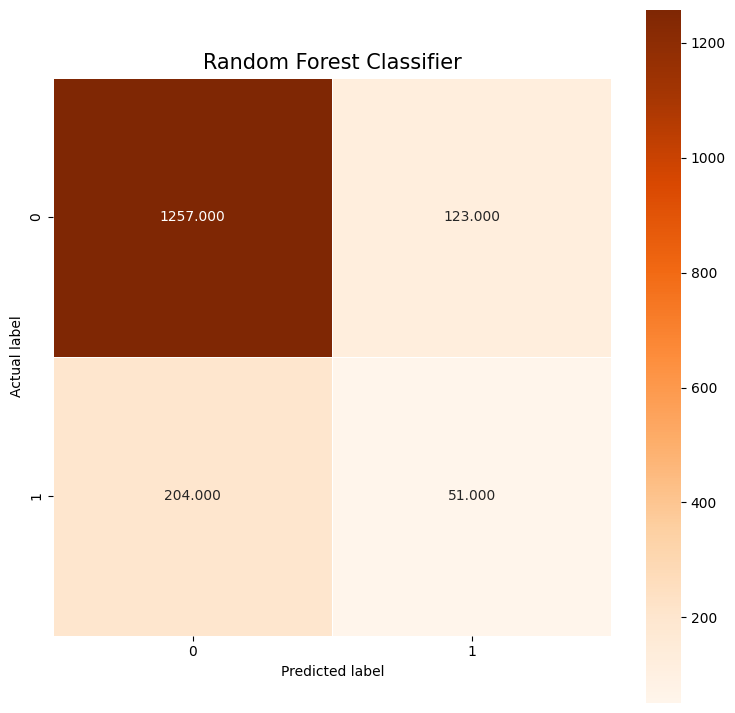

In [82]:
####  Random Forest  ####
model_RF = sklearn.ensemble.RandomForestClassifier(n_estimators=25, random_state=521) 
model_RF.fit(X_train_con, y_train)

y_pred = model_RF.predict(X_dev_con)
acc = accuracy_score(y_dev, y_pred)
f1 = f1_score(y_dev, y_pred)
print(acc)
print(f1)

cm = confusion_matrix(y_dev, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('Random Forest Classifier', size = 15);
plt.savefig('Confusion_matrix_RF.png')


tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])
print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))

0.6195718654434251
0.33547008547008544
Accuracy Score: 0.6195718654434251
TPR: 0.615686274509804
FPR: 0.37971014492753624


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


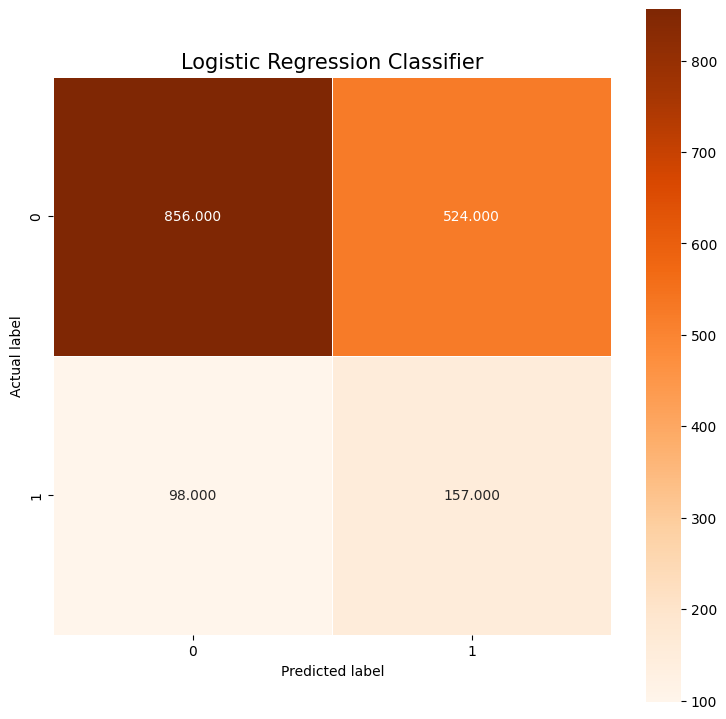

In [85]:
#### Logistic Regression #####
model_LR = LogisticRegression()
model_LR.fit(X_train_con, y_train)

y_pred = model_LR.predict(X_dev_con)
acc = accuracy_score(y_dev, y_pred)
print(acc)

f1 = f1_score(y_dev, y_pred)
print(f1)
print('Accuracy Score: {0}'.format(acc))

cm = confusion_matrix(y_dev, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('Logistic Regression Classifier', size = 15);
plt.savefig('Confusion_matrix_LR.png')

tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])
print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))


In [172]:
# probas_ = model_LR.predict_proba(X_dev_con)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)
# # Compute ROC curve and area the curve
# fpr, tpr, thresholds = roc_curve(y_dev, probas_[:, 1])
# tprs.append(interp(mean_fpr, fpr, tpr))
# tprs[-1][0] = 0.0
# roc_auc = auc(fpr, tpr)
# aucs.append(roc_auc)


# plt.plot(fpr, tpr, lw=1, alpha=0.3,
#          label='ROC (AUC = %0.2f)' % roc_auc)

# # plt.plot(x,x, "--")
# # plt.set_xlim([0,1])
# # plt.set_ylim([0,1])
# plt.title("ROC Curve", fontsize=14)
# plt.ylabel('TPR', fontsize=12)
# plt.xlabel('FPR', fontsize=12)
# plt.savefig('ROC_curve.png')


# print(roc_auc)

0.637308868501529
0.34763476347634764
TPR: 0.6196078431372549
FPR: 0.35942028985507246


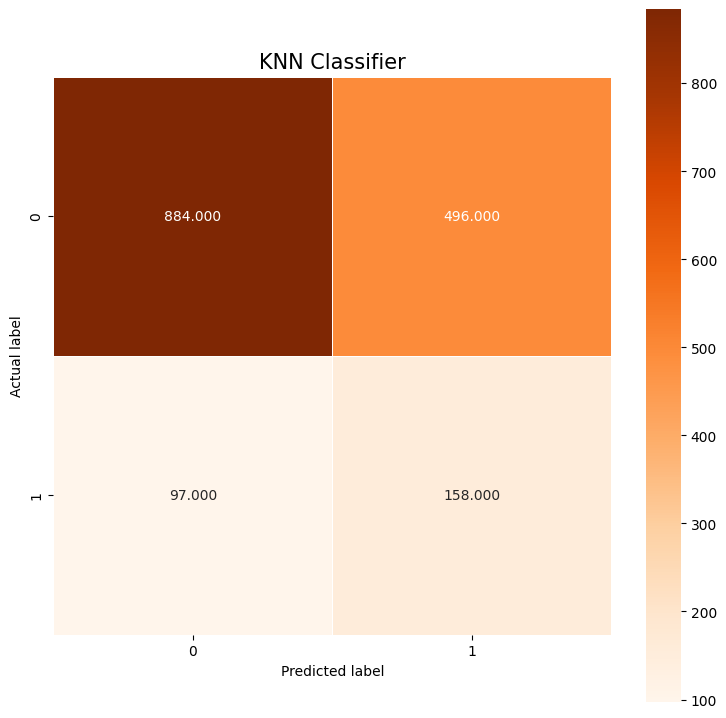

In [86]:
model_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=90)
model_knn.fit(X_train_con, y_train)

y_pred = model_knn.predict(X_dev_con)

acc = accuracy_score(y_dev, y_pred)
f1 = sklearn.metrics.f1_score(y_dev, y_pred)
print(acc)
print(f1)

cm = confusion_matrix(y_dev, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('KNN Classifier', size = 15);
plt.savefig('Confusion_matrix_KNN.png')

tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])
print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))

# Choose KNN and Test it on the test set!

In [136]:
model_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=80)
model_knn.fit(X_train_con, y_train)
y_pred = model_knn.predict(X_test_con)

acc = accuracy_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)
print('Accuracy: {0}'.format(acc))
print('F1 score: {0}'.format(f1))

Accuracy: 0.6409785932721712
F1 score: 0.32295271049596314


In [120]:
model_RF = sklearn.ensemble.RandomForestClassifier(n_estimators=25, random_state=521) 
model_RF.fit(X_train_con, y_train)

y_pred = model_RF.predict(X_test_con)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc)
print(f1)

0.8152905198776759
0.26699029126213597
